In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import os 
uncleaned = pd.ExcelFile("Weatherdata1996to2020.xls")
data_path = "C:\\Users\\Nakesh\\Desktop\\weather data\\jupyter-notebook-weather-project\\year wise csv"

In [2]:
# looping to all the csv file to make a single csv file
all_data = []
for year in range(1996 , 2021):
    if year in [2006,2007]:
        continue
    file_name = f"{year}.csv"
    file_path = os.path.join(data_path , file_name)
    df = pd.read_csv(file_path)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df[~df['Date'].astype(str).str.contains("Average", na=False)]
    df['Year'] = year
    all_data.append(df)


In [3]:
merged_df = pd.concat(all_data , ignore_index=True)
merged_df.to_csv("combined_weather_data.csv" , index = False)
# merged_df.head(30)
# merged_df.tail(30)

In [4]:
weather = pd.read_csv("combined_weather_data.csv")
# weather.iloc[ 500 : 530]

### Analysis Before data Cleaning ###

In [5]:
sheet_names = uncleaned.sheet_names

In [6]:
# describe the basics maths funcitons like mean median & mode  etc .
# Loop through each sheet

for sheet in sheet_names:
    df = pd.read_excel("Weatherdata1996to2020.xls", sheet_name=sheet)
    print(f"\nSheet: {sheet}")
    print("-" * 40)

    # Try to convert all columns to numeric (coerce errors)
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Select only numeric columns
    numeric_df = df_numeric.select_dtypes(include='number')

    if numeric_df.empty:
        print("No numeric columns found after conversion.")
        continue

    print("Mean:")
    print(numeric_df.mean())

    print("Median:")
    print(numeric_df.median())

    print("Mode:")
    print(numeric_df.mode().iloc[0])


Sheet: 1996
----------------------------------------
Mean:
Year 1996           NaN
Unnamed: 1    31.739071
Unnamed: 2    19.675956
Unnamed: 3    62.383880
Unnamed: 4    41.655191
Unnamed: 5     1.811202
Unnamed: 6     5.902077
dtype: float64
Median:
Year 1996       NaN
Unnamed: 1    30.00
Unnamed: 2    21.00
Unnamed: 3    60.00
Unnamed: 4    35.50
Unnamed: 5     0.00
Unnamed: 6     4.34
dtype: float64
Mode:
Year 1996       NaN
Unnamed: 1    28.00
Unnamed: 2    25.00
Unnamed: 3    84.00
Unnamed: 4    22.00
Unnamed: 5     0.00
Unnamed: 6     4.34
Name: 0, dtype: float64

Sheet: 1997
----------------------------------------
Mean:
Year 1997           NaN
Unnamed: 1    29.000000
Unnamed: 2    19.668493
Unnamed: 3    73.580822
Unnamed: 4    54.726575
Unnamed: 5     2.568767
Unnamed: 6     5.548027
dtype: float64
Median:
Year 1997       NaN
Unnamed: 1    29.00
Unnamed: 2    21.60
Unnamed: 3    76.00
Unnamed: 4    55.00
Unnamed: 5     0.00
Unnamed: 6     5.21
dtype: float64
Mode:
Year 1997   

# Total Number of Rows #


In [7]:
for sheet in sheet_names:
    df = pd.read_excel( "Weatherdata1996to2020.xls", sheet_name=sheet) 
    print(f"Sheet: {sheet} -> Rows: {df.shape[0]}")

Sheet: 1996 -> Rows: 368
Sheet: 1997 -> Rows: 368
Sheet: 1998 -> Rows: 368
Sheet: 1999 -> Rows: 367
Sheet: 2000 -> Rows: 368
Sheet: 2001 -> Rows: 368
Sheet: 2002 -> Rows: 368
Sheet: 2003 -> Rows: 368
Sheet: 2004 -> Rows: 368
Sheet: 2005 -> Rows: 368
Sheet: 2006 -> Rows: 57
Sheet: 2007 -> Rows: 30
Sheet: 2008 -> Rows: 380
Sheet: 2009 -> Rows: 379
Sheet: 2010 -> Rows: 379
Sheet: 2011 -> Rows: 379
Sheet: 2012 -> Rows: 380
Sheet: 2013 -> Rows: 379
Sheet: 2014 -> Rows: 379
Sheet: 2015 -> Rows: 379
Sheet: 2016 -> Rows: 380
Sheet: 2017 -> Rows: 379
Sheet: 2018 -> Rows: 384
Sheet: 2019 -> Rows: 380
Sheet: 2020 -> Rows: 381


## Total rows in xls file ( including all tabs ) ##

In [8]:
total_rows = 0
for sheet in sheet_names:
    sheet_df = pd.read_excel("Weatherdata1996to2020.xls", sheet_name=sheet)
    sheet_row_count = sheet_df.shape[0]
    total_rows += sheet_row_count
print(f"\n Total Rows in Entire File: {total_rows}")


 Total Rows in Entire File: 8704


## Size of data before Preprocessing ##

In [9]:
size_bytes = os.path.getsize("C:\\Users\\Nakesh\\Desktop\\weather data\\jupyter-notebook-weather-project\\Weatherdata1996to2020.xls") 
size_kb = size_bytes / 1024 
print(f"The size of Weatherdata1996to2020.xls is :{size_kb}")

The size of Weatherdata1996to2020.xls is :1022.0


## DATA PROCESSING ## 

In [10]:
# Removing rows with values 20,11,NaN in column "Rainy Days" 
weather = weather[~weather['Rainy Days '].isin([ 20 , 11 ])]
weather = weather[~weather['Rainy Days '].isna()] 

# Removing Rows with values "Average" in column "Date"
weather = weather[~weather['Date'].isin(['Average'])]

# Removing rows with blank spaces in column "Date"
weather = weather[~weather['Date'].isin([' '])]

# weather['Date'].value_counts(dropna=False)
# Removing Duplicate rows 
weather = weather.drop_duplicates(subset='Date')

weather['Date'].value_counts(dropna=False)

weather['Rainy Days '].unique()
weather['Rainy Days '].value_counts()

# weather['Rain'].unique()


Rainy Days 
0.0    2832
1.0     666
Name: count, dtype: int64

In [11]:
# weather['cloud cover'].value_counts(dropna=False)
# cloud cover
# NaN    7326
# 1.0     162
# 0.0     141
# 4.0      43
# 2.0      42
# 8.0      38
# 3.0      19
# 7.0      16
# 5.0      12
# 6.0       7
# Name: count, dtype: int64
# Removing the Cloud cover column bacause it has high nummber of Null values 
weather = weather.drop('cloud cover' , axis=1)

In [12]:
weather

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,01.01.20,21.0,13.5,NaN,NaN,0.0,0.0,0.43,1996
1,2.01.20,22.5,13.5,NaN,NaN,2.0,1.0,0.43,1996
2,3.01.20,21.5,15.5,NaN,NaN,0.0,0.0,0.43,1996
3,4.01.20,19.0,11.5,NaN,NaN,0.0,0.0,0.87,1996
4,5.01.20,23.0,8.0,NaN,NaN,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...
7662,27.12.19,20.5,8.0,NaN,NaN,0.0,0.0,3.04,2019
7663,28.12.19,21.5,6.5,NaN,NaN,0.0,0.0,3.47,2019
7664,29.12.19,22.5,5.5,NaN,NaN,0.0,0.0,3.47,2019
7665,30.12.19,22.0,6.0,NaN,NaN,0.0,0.0,3.04,2019


In [13]:
# converting non-numaric values into numeric 
weather['Max.'] = pd.to_numeric(weather['Max.'], errors='coerce')
weather['Min.'] = pd.to_numeric(weather['Min.'], errors='coerce')
weather['Morn'] = pd.to_numeric(weather['Morn'], errors='coerce')
weather['Eve'] = pd.to_numeric(weather['Eve'], errors='coerce')
weather['PE'] = pd.to_numeric(weather['PE'], errors='coerce')
weather['Date'] = pd.to_numeric(weather['Date'], errors='coerce')
weather['Rainy Days '] = pd.to_numeric(weather['Rainy Days '], errors='coerce')
weather['Rain'] = pd.to_numeric(weather['Rain'], errors='coerce')




In [14]:
# Filling Meadian In place of NaN values 

# calculating median for each column 
median_Max = weather['Max.'].median()
median_Min = weather['Min.'].median()
median_Morn = weather['Morn'].median()
median_Eve = weather['Eve'].median()
median_PE = weather['PE'].median()


# replace Null value with median 
weather['Max.'] = weather['Max.'].fillna(median_Max)
weather['Min.'] = weather['Min.'].fillna(median_Min)
weather['Morn'] = weather['Morn'].fillna(median_Morn)
weather['Eve'] = weather['Eve'].fillna(median_Eve)
weather['PE'] = weather['PE'].fillna(median_PE)


In [15]:
# print(weather['Eve'].unique())
# print(weather['Morn'].unique())
# print(weather['Min.'].unique())


In [16]:
weather

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,NaN,21.0,13.5,78.0,49.0,0.0,0.0,0.43,1996
1,NaN,22.5,13.5,78.0,49.0,2.0,1.0,0.43,1996
2,NaN,21.5,15.5,78.0,49.0,0.0,0.0,0.43,1996
3,NaN,19.0,11.5,78.0,49.0,0.0,0.0,0.87,1996
4,NaN,23.0,8.0,78.0,49.0,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...
7662,NaN,20.5,8.0,78.0,49.0,0.0,0.0,3.04,2019
7663,NaN,21.5,6.5,78.0,49.0,0.0,0.0,3.47,2019
7664,NaN,22.5,5.5,78.0,49.0,0.0,0.0,3.47,2019
7665,NaN,22.0,6.0,78.0,49.0,0.0,0.0,3.04,2019


In [17]:
# cheking for any Null values 
print(weather.isnull().sum())


Date           3498
Max.              0
Min.              0
Morn              0
Eve               0
Rain              0
Rainy Days        0
PE                0
Year              0
dtype: int64


In [18]:
# exporting the weather DataFrame to CSV format 
weather.to_csv('weather_clean_dataSet.csv', index=False)
type(weather['Date'])

pandas.core.series.Series

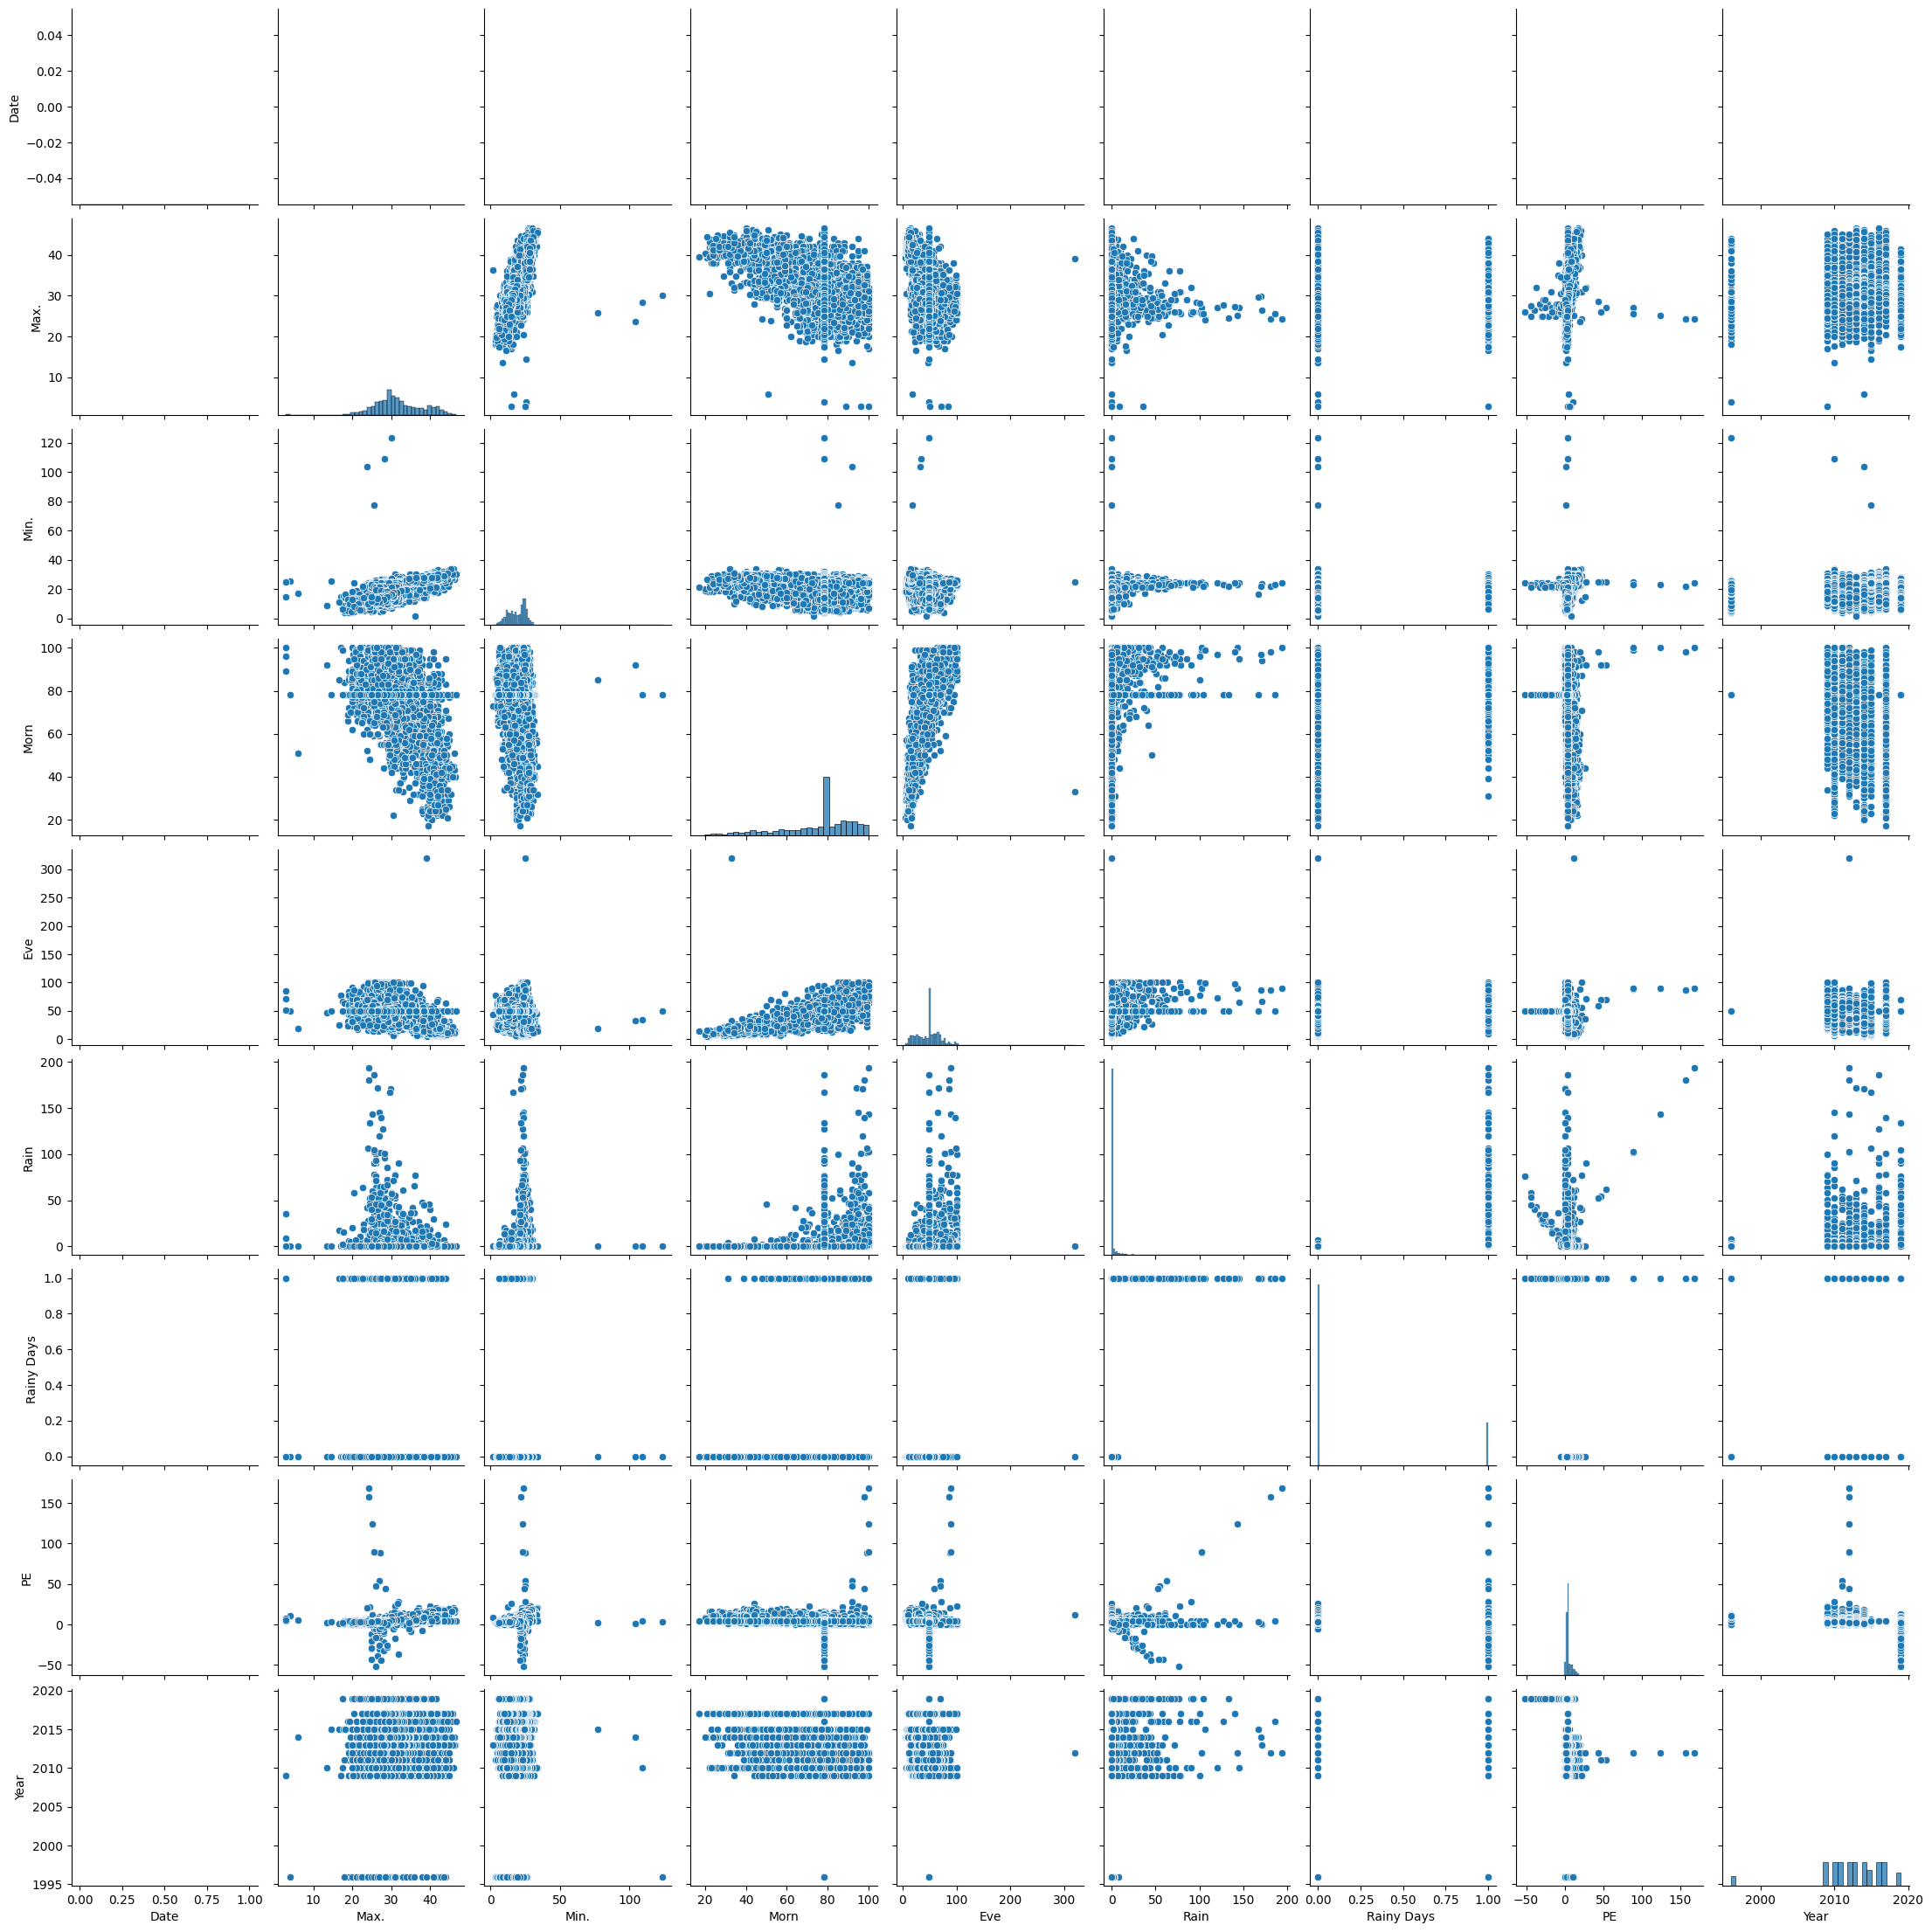

In [19]:
# Plotting 

sns.pairplot(weather)



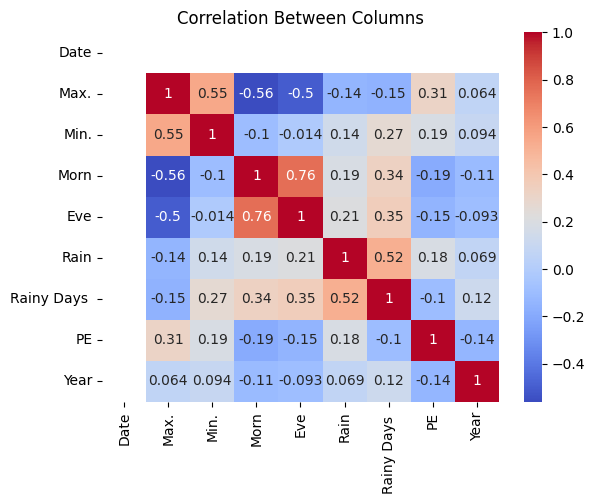

In [20]:

sns.heatmap(weather.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Columns")
plt.show()


In [21]:
print(weather.dtypes)


Date           float64
Max.           float64
Min.           float64
Morn           float64
Eve            float64
Rain           float64
Rainy Days     float64
PE             float64
Year             int64
dtype: object


In [22]:
# # Splitting data set for Training & testing 
weather = weather.drop('Year', axis=1)
weather = weather.drop('Date', axis=1)

train = weather[ : 3400]
test = weather[ 3400 : ]


## Analysis After data Processing ## 

In [23]:
# Top 5 rows 
print(weather.head())

# columns & Their types
print(weather.info())

# Missing values 
print(weather.isnull().sum())

# Summary statistics
print(weather.describe())


   Max.  Min.  Morn   Eve  Rain  Rainy Days     PE
0  21.0  13.5  78.0  49.0   0.0          0.0  0.43
1  22.5  13.5  78.0  49.0   2.0          1.0  0.43
2  21.5  15.5  78.0  49.0   0.0          0.0  0.43
3  19.0  11.5  78.0  49.0   0.0          0.0  0.87
4  23.0   8.0  78.0  49.0   0.0          0.0  1.74
<class 'pandas.core.frame.DataFrame'>
Index: 3498 entries, 0 to 7666
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Max.         3498 non-null   float64
 1   Min.         3498 non-null   float64
 2   Morn         3498 non-null   float64
 3   Eve          3498 non-null   float64
 4   Rain         3498 non-null   float64
 5   Rainy Days   3498 non-null   float64
 6   PE           3498 non-null   float64
dtypes: float64(7)
memory usage: 218.6 KB
None
Max.           0
Min.           0
Morn           0
Eve            0
Rain           0
Rainy Days     0
PE             0
dtype: int64
              Max.         Min.     

## Total Number Of rows in data after Preprocessing ## 

In [24]:
rows_length = len(weather)
print(f"Total Number of rows after Preprocessing : {rows_length}")

Total Number of rows after Preprocessing : 3498


## Size of weather file after preprocessing ##


In [25]:
total_size_bytes = weather.memory_usage(deep=True).sum()
total_size_mb = total_size_bytes / (1024 * 1024)
print(f"Total DataFrame size: {total_size_mb:.2f} MB")

Total DataFrame size: 0.21 MB
